In [2]:
#installment packages

import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt 
%matplotlib inline
# import plotly.express as px
# import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from scipy.stats import zscore

from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
# import umap

from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.metrics import silhouette_score

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

from sklearn import cluster 
from sklearn.cluster import SpectralClustering

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Reading the csv file
BDataRaw = pd.read_csv("Credit Card Customer Data.csv")

In [5]:
BDataRaw.head()


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [29]:
# Renaming Customer Key to Customer_Key
BDataRaw.rename(columns={'Customer Key' : 'Customer_Key'},inplace=True)
BDataRaw.head()

,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [30]:
#Shape of data
BDataRaw.shape

(660, 7)

In [31]:
BDataRaw.tail()

,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


In [32]:

#Finding Data Types
BDataRaw.dtypes

Sl_No                  int64
Customer_Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [10]:
#Checking fo zero values
BDataRaw.isnull().sum()

Sl_No                  0
Customer_Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [11]:
#Value Counts for different variables


BDataRaw['Sl_No'].value_counts()

660    1
226    1
224    1
223    1
222    1
      ..
440    1
439    1
438    1
437    1
1      1
Name: Sl_No, Length: 660, dtype: int64

In [12]:
BDataRaw['Customer_Key'].value_counts()

47437    2
37252    2
97935    2
96929    2
50706    2
        ..
66706    1
72339    1
69965    1
85645    1
71681    1
Name: Customer_Key, Length: 655, dtype: int64

In [13]:
BDataRaw['Avg_Credit_Limit'].value_counts()

8000      35
6000      31
9000      28
13000     28
10000     26
          ..
25000      1
153000     1
111000     1
112000     1
106000     1
Name: Avg_Credit_Limit, Length: 110, dtype: int64

In [14]:
BDataRaw['Total_Credit_Cards'].value_counts()

4     151
6     117
7     101
5      74
2      64
1      59
3      53
10     19
9      11
8      11
Name: Total_Credit_Cards, dtype: int64

In [15]:
BDataRaw['Total_visits_bank'].value_counts()

2    158
1    112
3    100
0    100
5     98
4     92
Name: Total_visits_bank, dtype: int64

In [16]:
BDataRaw['Total_visits_online'].value_counts()

2     189
0     144
1     109
4      69
5      54
3      44
15     10
7       7
12      6
10      6
8       6
13      5
11      5
9       4
14      1
6       1
Name: Total_visits_online, dtype: int64

In [17]:
BDataRaw['Total_calls_made'].value_counts()

4     108
0      97
2      91
1      90
3      83
6      39
7      35
9      32
8      30
5      29
10     26
Name: Total_calls_made, dtype: int64

In [20]:
BDataRaw.columns

Index(['Sl_No', 'Customer_Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [21]:
# Checking for negative values
totalEntries = len(BDataRaw) # totalEntries - number of entries (rows) in the dataset
intColumns = ['Sl_No', 'Customer_Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
for col in intColumns:
    count = 0;  # count - to keep track of numer of negative entries
    print('Column = ',col)  #pinting the current column
    for i in range(0,totalEntries):
       if (BDataRaw[col][i] < 0):    
            #print(BD[temp][i])
            count = count + 1
    print('Total number of Negative entries = ', count)
            

Column =  Sl_No
Total number of Negative entries =  0
Column =  Customer_Key
Total number of Negative entries =  0
Column =  Avg_Credit_Limit
Total number of Negative entries =  0
Column =  Total_Credit_Cards
Total number of Negative entries =  0
Column =  Total_visits_bank
Total number of Negative entries =  0
Column =  Total_visits_online
Total number of Negative entries =  0
Column =  Total_calls_made
Total number of Negative entries =  0


In [22]:
#Checking for unique values
BDataRaw.nunique()

Sl_No                  660
Customer_Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

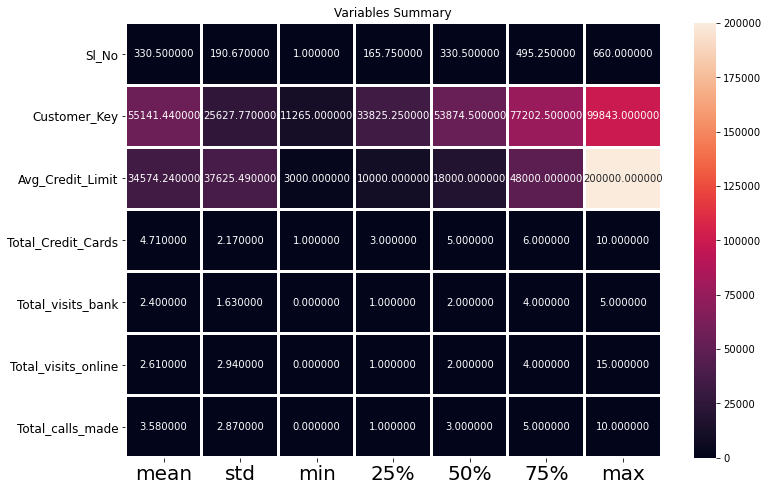

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(round(BDataRaw.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=20)
plt.yticks(fontsize=12)
plt.title("Variables Summary")
plt.show()

In [24]:
#Description of attributes
BDataRaw.describe()

,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [25]:
BDataRaw.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer_Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


In [26]:
BDataRaw.corr()

,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,1.000000,0.052886,0.677962,0.739329,0.406438,0.033916,-0.684125
Customer_Key,0.052886,1.000000,0.068604,-0.010281,-0.000560,0.022506,0.005968
Avg_Credit_Limit,0.677962,0.068604,1.000000,0.608860,-0.100312,0.551385,-0.414352
Total_Credit_Cards,0.739329,-0.010281,0.608860,1.000000,0.315796,0.167758,-0.651251
Total_visits_bank,0.406438,-0.000560,-0.100312,0.315796,1.000000,-0.551861,-0.506016
Total_visits_online,0.033916,0.022506,0.551385,0.167758,-0.551861,1.000000,0.127299
Total_calls_made,-0.684125,0.005968,-0.414352,-0.651251,-0.506016,0.127299,1.000000


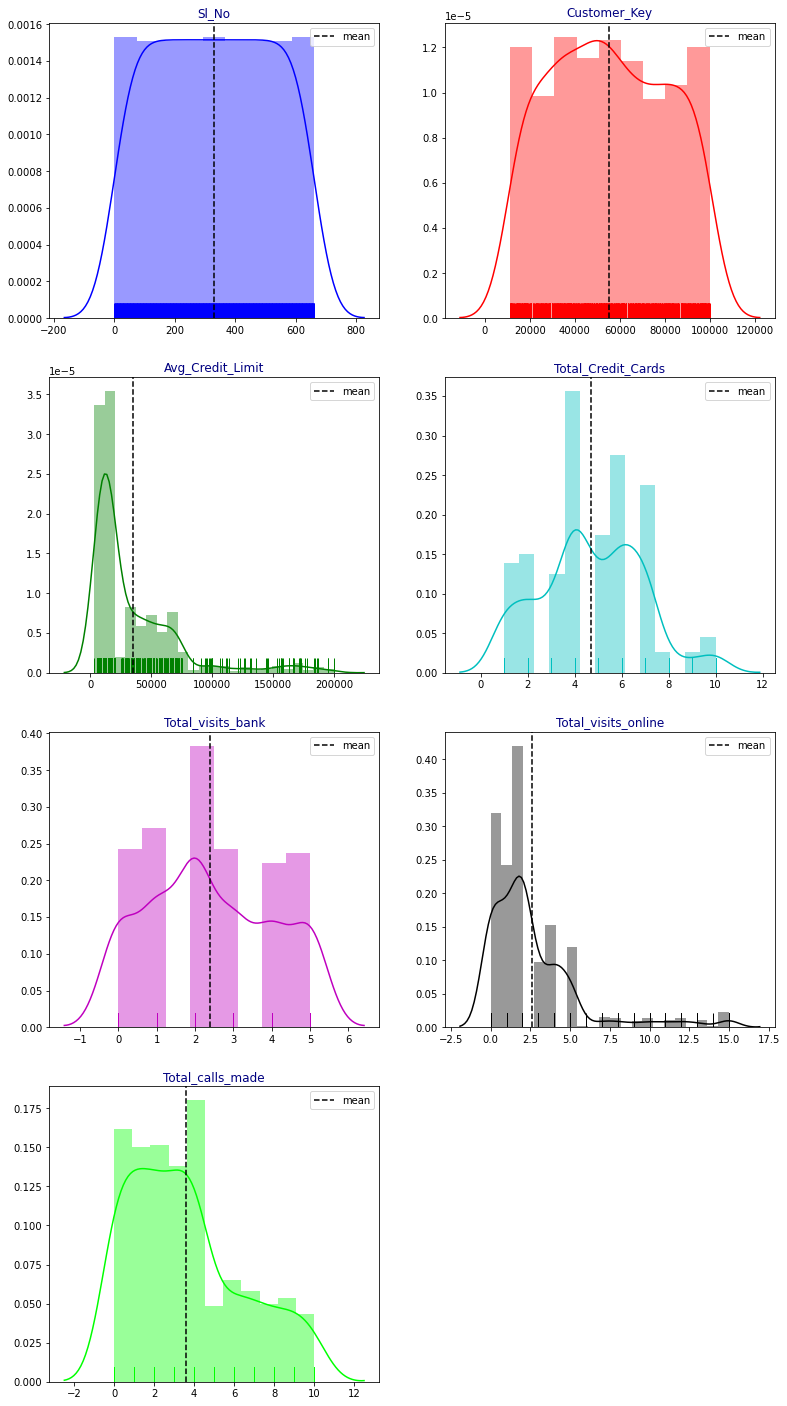

In [33]:
import itertools

cols = [i for i in BDataRaw.columns ]
length = len(cols)
cs = ["b","r","g","c","m","k","lime"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(BDataRaw[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(BDataRaw[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

### Correlation Between Variables

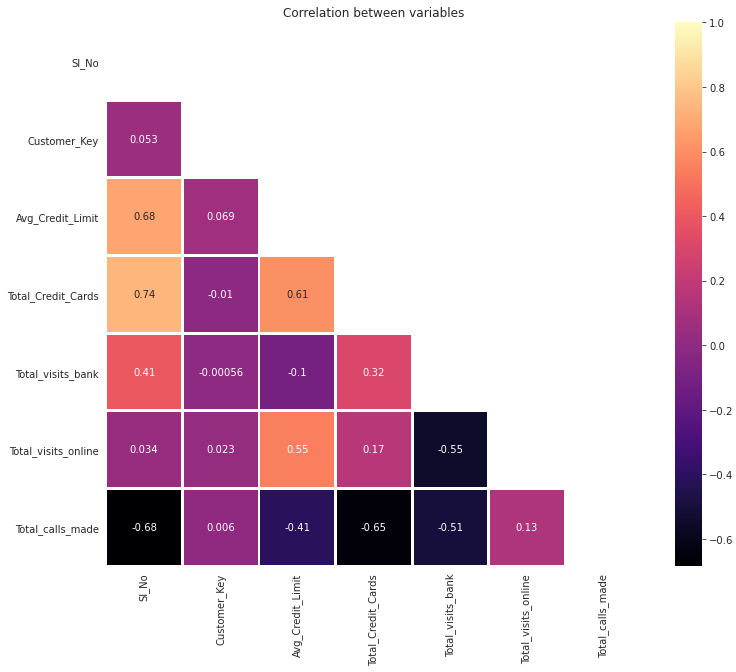

In [35]:
cor = BDataRaw.corr()

mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12,10))

with sns.axes_style("white"):
    sns.heatmap(cor,annot=True,linewidth=2,
                mask = mask,cmap="magma")
plt.title("Correlation between variables")
plt.show()

### Swarm Plot For Variables

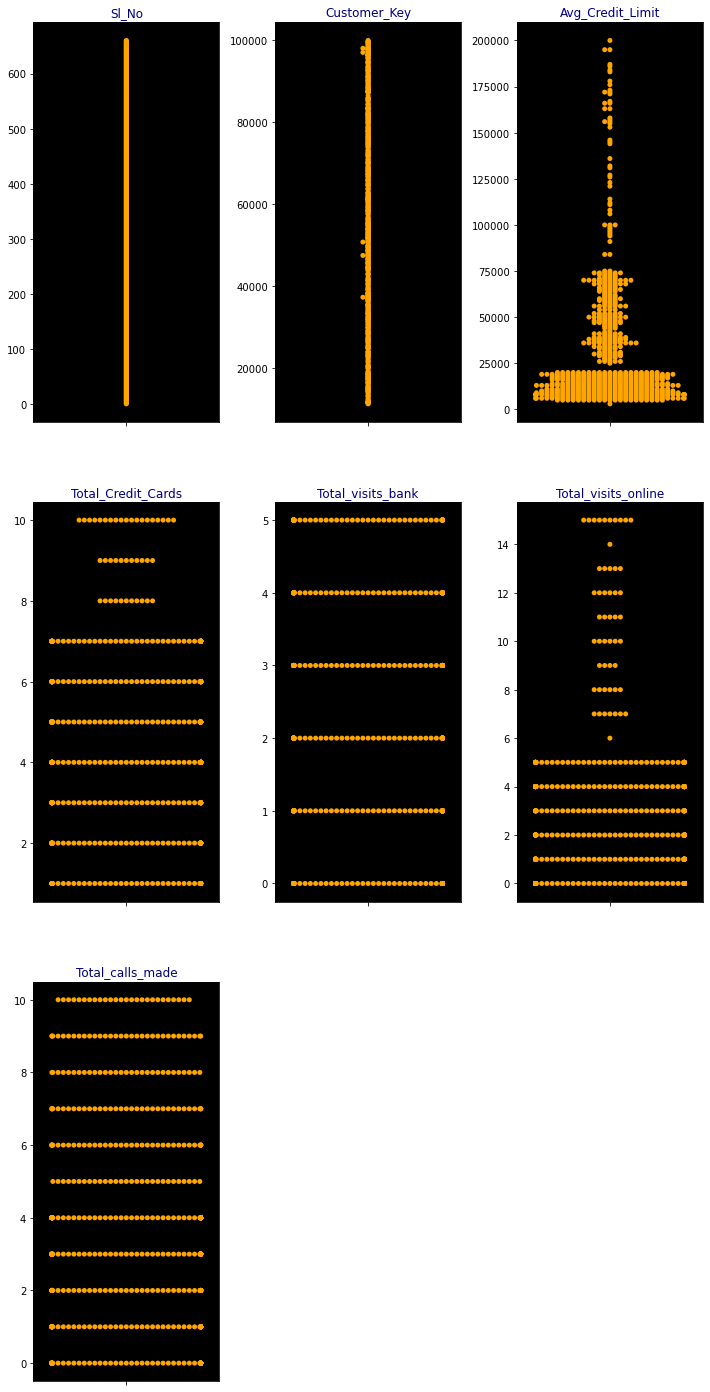

In [37]:
cols = ['Sl_No', 'Customer_Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
length = len(cols)

plt.figure(figsize=(12,25))

for i,j in itertools.zip_longest(cols,range(length)):
    
    plt.subplot(3,3,j+1)
    ax = sns.swarmplot( y = BDataRaw[i],color="orange")
    ax.set_facecolor("k")
    ax.set_ylabel("")
    ax.set_title(i,color="navy")
    plt.subplots_adjust(wspace = .3)
    

### Pairplot Between Variables

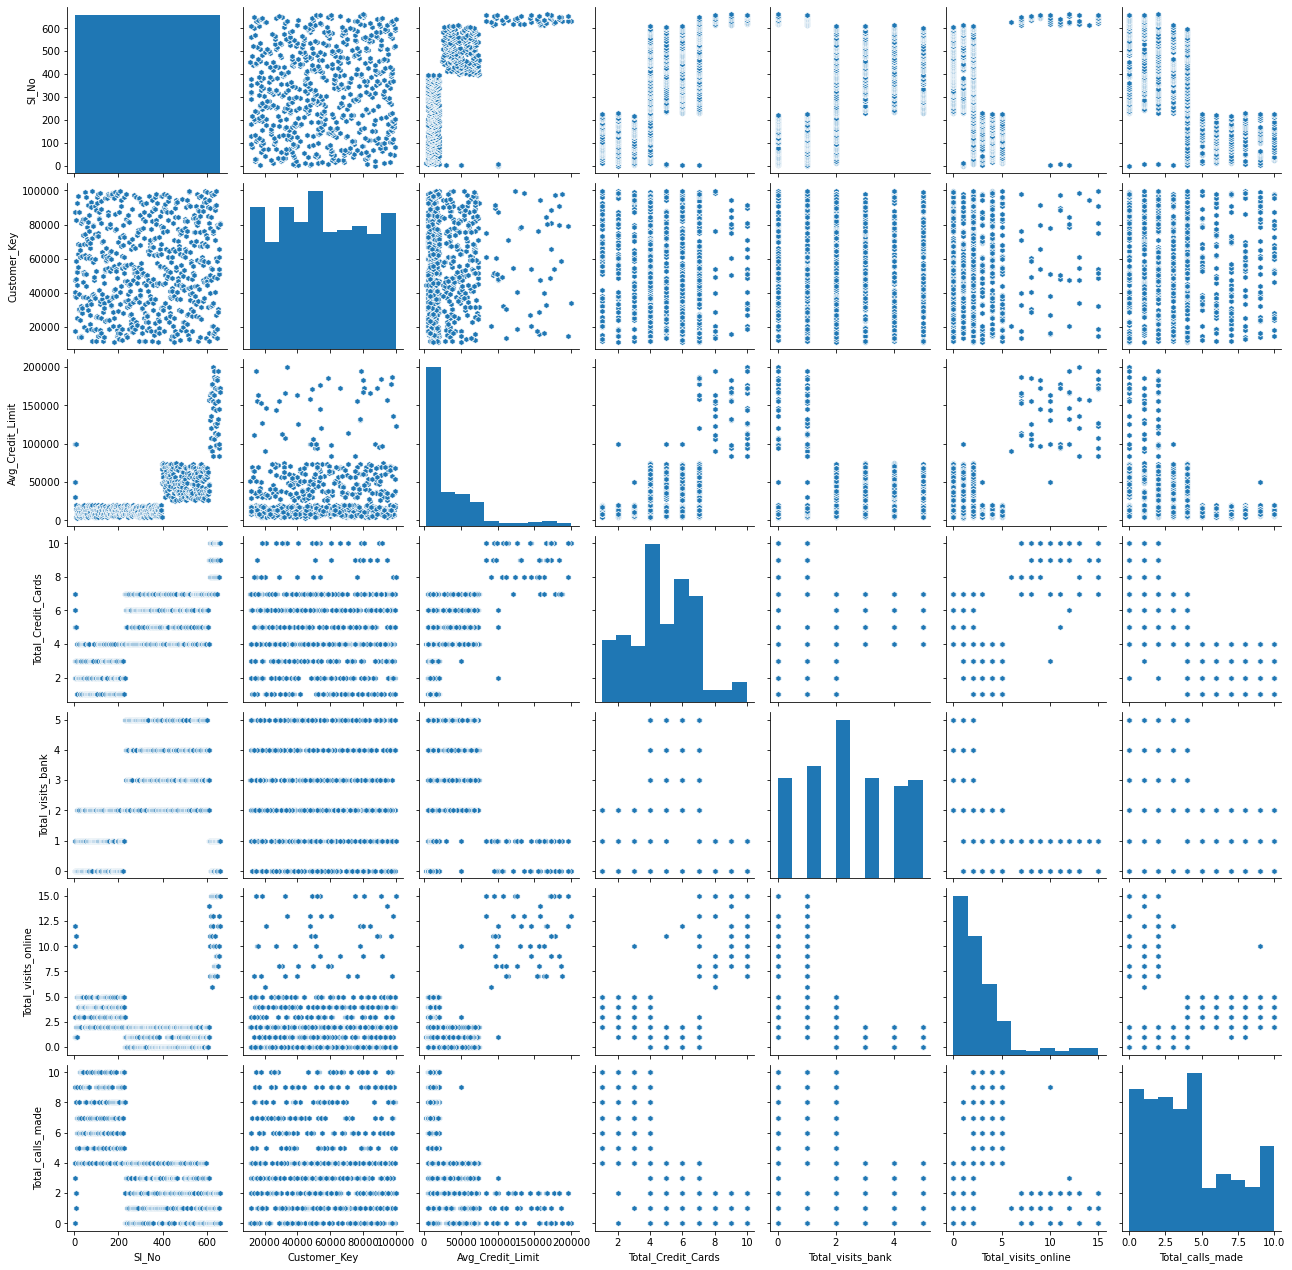

In [53]:
sns.pairplot(BDataRaw,markers="h")
plt.show()

In [38]:
#Dropping columns
BDataRaw = BDataRaw.drop("Sl_No",axis=1)
BDataRaw = BDataRaw.drop("Customer_Key",axis=1)
BDataRaw = BDataRaw.drop("Total_visits_bank",axis=1)
BDataRaw = BDataRaw.drop("Total_calls_made",axis=1)

BData = BDataRaw

### Pairplot After Dropping Columns

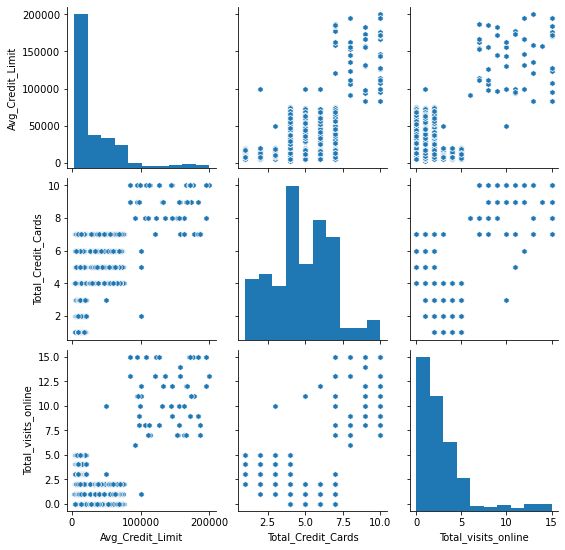

In [55]:
sns.pairplot(BData,markers="h")
plt.show()

In [59]:
#Feature Scaling

BDataScaled = BData.apply(zscore)
BDataScaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_online
0,1.740187,-1.249225,-0.547490
1,0.410293,-0.787585,2.520519
2,0.410293,1.058973,0.134290
3,-0.121665,0.135694,-0.547490
4,1.740187,0.597334,3.202298


### Applying K-Means Clustering

In [61]:
#Finding optimal no. of clusters
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(BDataScaled)
    prediction=model.predict(BDataScaled)
    meanDistortions.append(sum(np.min(cdist(BDataScaled, model.cluster_centers_, 'euclidean'), axis=1)) / BDataScaled.shape[0])
BData['labels'] = model.labels_
BData.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_online,labels
0,100000,2,1,6
1,50000,3,10,2
2,50000,7,3,0
3,30000,5,1,3
4,100000,6,12,5
5,20000,3,1,3
6,100000,5,11,5
7,15000,3,1,3
8,5000,2,2,4
9,3000,4,1,3


Text(0.5, 1.0, 'Elbow Method For Optimal K')

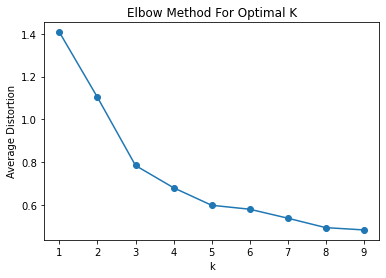

In [64]:
plt.plot(clusters, meanDistortions,marker = "o")
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Elbow Method For Optimal K')

In [65]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean',linkage='average')
model.fit(BDataScaled)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [67]:
BData['labels'] = model.labels_
BData.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_online,labels
0,100000,2,1,0
1,50000,3,10,2
2,50000,7,3,0
3,30000,5,1,0
4,100000,6,12,2
5,20000,3,1,0
6,100000,5,11,2
7,15000,3,1,0
8,5000,2,2,0
9,3000,4,1,0


In [68]:
BDataCluster = BData.groupby(['labels'])
BDataCluster.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_online
labels,,,
0,25807.881773,4.377668,1.912972
1,142750.000000,8.875000,10.875000
2,83333.333333,4.666667,11.000000


In [78]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(BDataScaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(BDataScaled))

c

0.9094676632761964

### Dendogram with Average Linkage

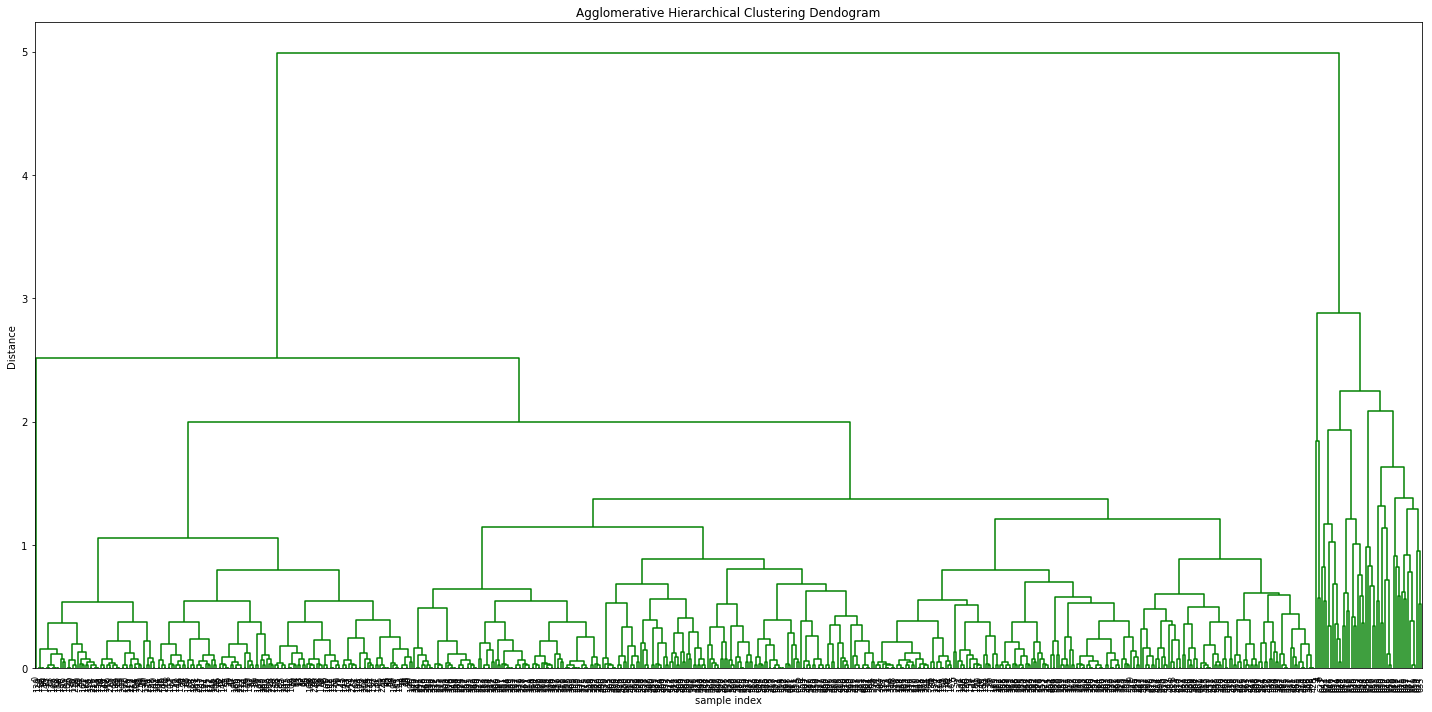

In [79]:
plt.figure(figsize=(20, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [81]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(BDataScaled, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(BDataScaled))

c

0.9016837654727806

### Dendogram with Complete Linkage


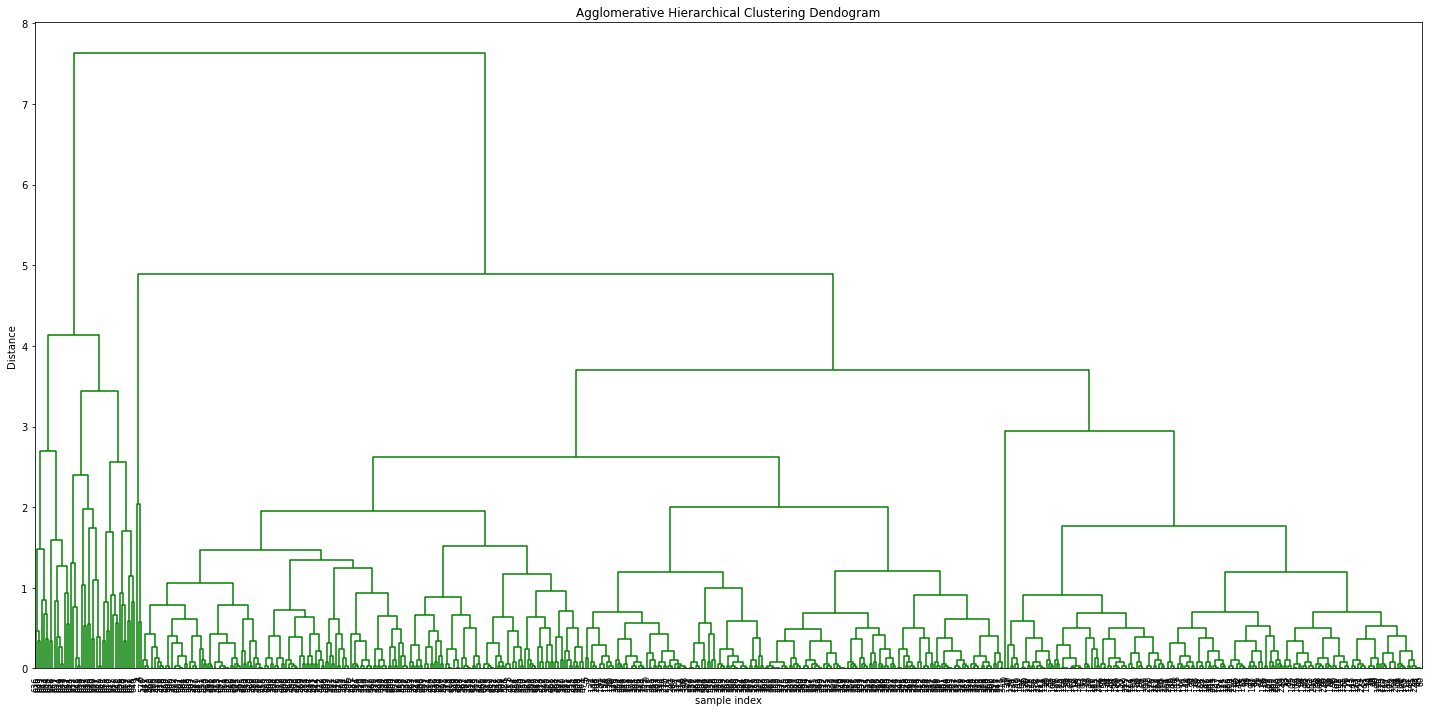

In [82]:
plt.figure(figsize=(20, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [83]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(BDataScaled, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(BDataScaled))

c

0.8319247060907332

### Dendogram With Ward Option

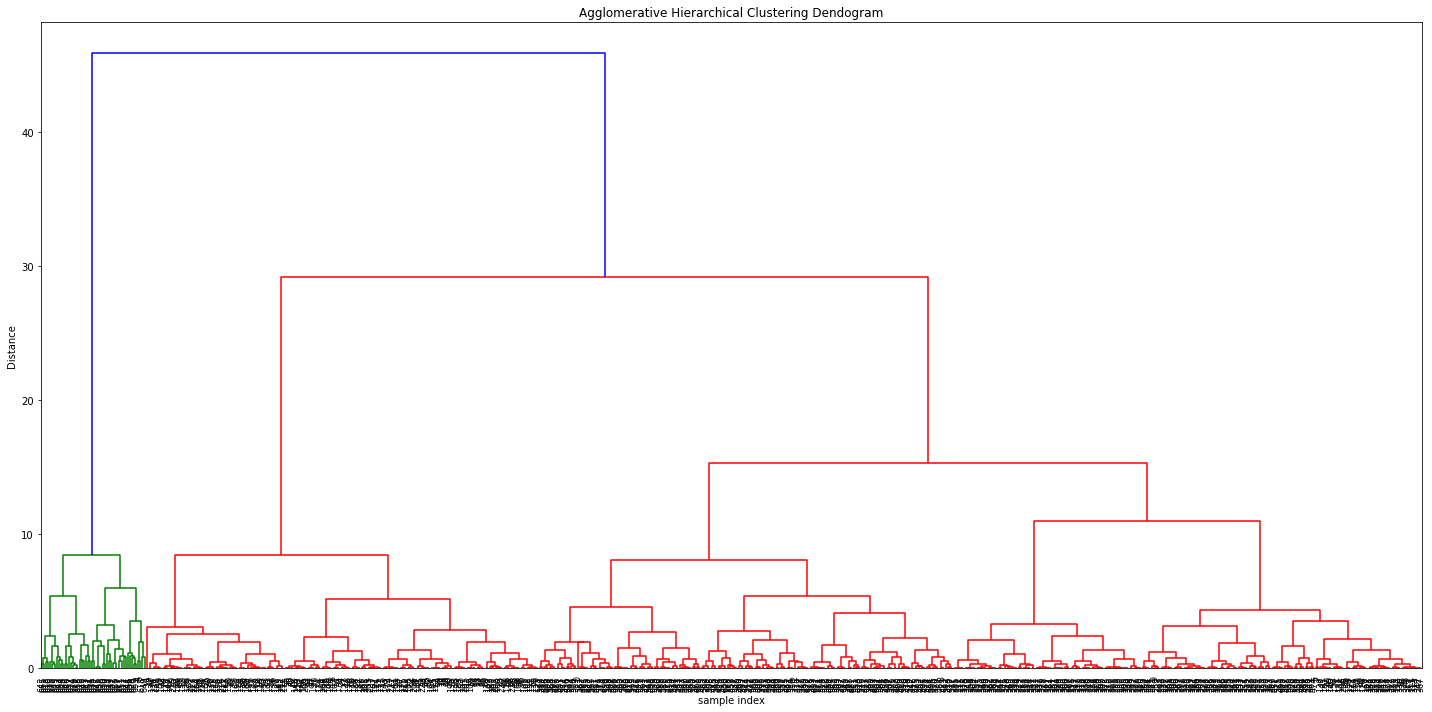

In [84]:
plt.figure(figsize=(20, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

### Finding Silhouette Coefficient

In [86]:
from sklearn import metrics
selected_cluster = 0
previous_sil_coeff = 0.001 #some random small number not 0
sc_vals = []
for n_cluster in range(2,10):
    kmeans = KMeans(n_clusters=n_cluster).fit(BData)
    label = kmeans.labels_
    sil_coeff = metrics.silhouette_score(BDataScaled, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    percent_change = ((sil_coeff-previous_sil_coeff)/previous_sil_coeff)*100
    print(percent_change)
    previous_sil_coeff = sil_coeff

For n_clusters=2, The Silhouette Coefficient is 0.6915343663917686
69053.43663917686
For n_clusters=3, The Silhouette Coefficient is 0.3167747209162655
-54.192483221172836
For n_clusters=4, The Silhouette Coefficient is 0.1735189416617406
-45.22323588200473
For n_clusters=5, The Silhouette Coefficient is 0.17028649929173023
-1.8628757984887383
For n_clusters=6, The Silhouette Coefficient is 0.04352045383538708
-74.44280432306674
For n_clusters=7, The Silhouette Coefficient is -0.0021250061206829663
-104.88277564549453
For n_clusters=8, The Silhouette Coefficient is -0.01338927092870259
530.0815229840066
For n_clusters=9, The Silhouette Coefficient is -0.0068344920307257424
-48.955457940023926
